In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings 
warnings.filterwarnings("ignore")
from scipy import stats

In [4]:
car=pd.read_csv("Cars Data.csv")

In [5]:
car

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [6]:
car.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [7]:
car.index

RangeIndex(start=0, stop=432, step=1)

In [8]:
car.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower     float64
MPG_City       float64
MPG_Highway    float64
Weight         float64
Wheelbase      float64
Length         float64
dtype: object

In [9]:
car.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [10]:
car.tail()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0
431,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208.0,20.0,27.0,3823.0,109.0,186.0


In [11]:
car.describe() 

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [12]:
car.shape # by this we can check the 432 rows and 15 columns aee there while in descriptiom im count section value is not 432
            # it means either missing value or null value is exists in dataset

(432, 15)

In [15]:
car.count()

Make           428
Model          428
Type           428
Origin         428
DriveTrain     428
MSRP           428
Invoice        428
EngineSize     428
Cylinders      426
Horsepower     428
MPG_City       428
MPG_Highway    428
Weight         428
Wheelbase      428
Length         428
dtype: int64

In [16]:
#car.nunique()

Make            38
Model          425
Type             6
Origin           3
DriveTrain       3
MSRP           410
Invoice        425
EngineSize      43
Cylinders        7
Horsepower     110
MPG_City        28
MPG_Highway     33
Weight         348
Wheelbase       40
Length          67
dtype: int64

In [18]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


In [21]:
car.value_counts()

Make        Model                      Type   Origin  DriveTrain  MSRP      Invoice   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length
Acura       3.5 RL 4dr                 Sedan  Asia    Front       $43,755   $39,014   3.5         6.0        225.0       18.0      24.0         3880.0  115.0      197.0     1
Mitsubishi  Lancer LS 4dr              Sedan  Asia    Front       $16,722   $15,718   2.0         4.0        120.0       25.0      31.0         2795.0  102.0      181.0     1
            Lancer ES 4dr              Sedan  Asia    Front       $14,622   $13,751   2.0         4.0        120.0       25.0      31.0         2656.0  102.0      181.0     1
            Galant GTS 4dr             Sedan  Asia    Front       $25,700   $23,883   3.8         6.0        230.0       18.0      26.0         3649.0  108.0      191.0     1
            Galant ES 2.4L 4dr         Sedan  Asia    Front       $19,312   $17,957   2.4         4.0        160.0       23.0     

# 1. data cleaning check null value if yes then fill it with mean of that column

In [22]:
 np.mean(car)

EngineSize        3.196729
Cylinders         5.807512
Horsepower      215.885514
MPG_City         20.060748
MPG_Highway      26.843458
Weight         3577.953271
Wheelbase       108.154206
Length          186.362150
dtype: float64

In [25]:
car.isnull()           # false means no null value present if true then null value present

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
428,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
429,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
430,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
car.isnull().sum() # null value before running the fillna comman with measn value

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [41]:
 np.mean(car)

EngineSize        3.196729
Cylinders         5.807512
Horsepower      215.885514
MPG_City         20.060748
MPG_Highway      26.843458
Weight         3577.953271
Wheelbase       108.154206
Length          186.362150
dtype: float64

In [38]:
car.fillna(car.mean(),inplace=True) # filled the null value with means value

In [39]:
car

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [40]:
car.isnull().sum()  # null value after running the fillna comman with measn value

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [35]:
car['EngineSize'].fillna(car['EngineSize'].mean())

0      3.5
1      2.0
2      2.4
3      3.2
4      3.5
      ... 
427    2.4
428    2.3
429    2.9
430    1.9
431    2.5
Name: EngineSize, Length: 432, dtype: float64

In [30]:
car.notnull().sum()

Make           428
Model          428
Type           428
Origin         428
DriveTrain     428
MSRP           428
Invoice        428
EngineSize     428
Cylinders      426
Horsepower     428
MPG_City       428
MPG_Highway    428
Weight         428
Wheelbase      428
Length         428
dtype: int64

# 2. Different types of make are there in dataset and what is count and occurrence of each make in dataset

In [42]:
car['Make'].value_counts()

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Volkswagen       15
Chrysler         15
Dodge            13
Mitsubishi       13
Volvo            12
Jaguar           12
Hyundai          12
Subaru           11
Pontiac          11
Mazda            11
Lexus            11
Kia              11
Buick             9
Mercury           9
Lincoln           9
Saturn            8
Cadillac          8
Suzuki            8
Infiniti          8
GMC               8
Acura             7
Porsche           7
Saab              7
Land Rover        3
Oldsmobile        3
Jeep              3
Scion             2
Isuzu             2
MINI              2
Hummer            1
Name: Make, dtype: int64

# 3. show all records where origin is asia and europe

In [44]:
car.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0


In [45]:
car[car['Origin'].isin(["Asia",'Europe'])]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


# removing unwanted records where weigh is above 4000

In [48]:
car.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [49]:
car[car['Weight']>4000]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
15,Audi,A4 3.0 Quattro convertible 2dr,Sedan,Europe,All,"$44,240","$40,075",3.0,6.0,220.0,18.0,25.0,4013.0,105.0,180.0
17,Audi,A6 4.2 Quattro 4dr,Sedan,Europe,All,"$49,690","$44,936",4.2,8.0,300.0,17.0,24.0,4024.0,109.0,193.0
18,Audi,A8 L Quattro 4dr,Sedan,Europe,All,"$69,190","$64,740",4.2,8.0,330.0,17.0,24.0,4399.0,121.0,204.0
20,Audi,RS 6 4dr,Sports,Europe,Front,"$84,600","$76,417",4.2,8.0,450.0,15.0,22.0,4024.0,109.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,Volkswagen,Touareg V6,SUV,Europe,All,"$35,515","$32,243",3.2,6.0,220.0,15.0,20.0,5086.0,112.0,187.0
415,Volkswagen,Phaeton 4dr,Sedan,Europe,Front,"$65,000","$59,912",4.2,8.0,335.0,16.0,22.0,5194.0,118.0,204.0
416,Volkswagen,Phaeton W12 4dr,Sedan,Europe,Front,"$75,000","$69,130",6.0,12.0,420.0,12.0,19.0,5399.0,118.0,204.0
419,Volkswagen,Passat W8,Wagon,Europe,Front,"$40,235","$36,956",4.0,8.0,270.0,18.0,25.0,4067.0,106.0,184.0


In [51]:
car[~(car['Weight']>4000)]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225.0,18.0,24.0,3893.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [52]:
428-329

99

In [54]:
#increase all the values of mpg_city columns by 3

In [55]:
car["MPG_City"]=car["MPG_City"].apply(lambda x:x+3)

In [56]:
car

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,20.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,27.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,25.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,23.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,21.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,24.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,23.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,22.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,25.0,29.0,2822.0,101.0,180.0


In [58]:
car.median()

EngineSize        3.0
Cylinders         6.0
Horsepower      210.0
MPG_City         22.0
MPG_Highway      26.0
Weight         3476.5
Wheelbase       107.0
Length          187.0
dtype: float64

In [59]:
car.std()

EngineSize       1.103438
Cylinders        1.547557
Horsepower      71.501909
MPG_City         5.213854
MPG_Highway      5.714497
Weight         755.453041
Wheelbase        8.273153
Length          14.291210
dtype: float64

<Axes: ylabel='Density'>

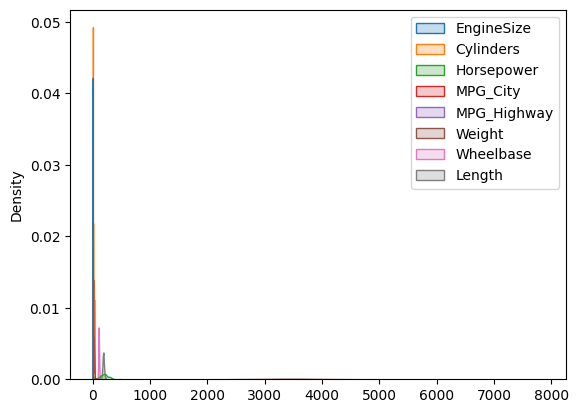

In [60]:
sns.kdeplot(car, shade=True)

In [76]:
mode = statistics.mode(car.Type)

print(mode)  # max type of car in dataset is sedan

Sedan


In [79]:
mode = statistics.mode(car.Origin)

print(mode)    # max car origin in asia

Asia


In [80]:
car["Type"].value_counts()

Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64

In [83]:
mode = statistics.mode(car.Weight)
print (mode)

3577.9532710280373


In [81]:
car["Weight"].value_counts()

3450.000000    4
3577.953271    4
3285.000000    4
3175.000000    4
4057.000000    3
              ..
2702.000000    1
3028.000000    1
5464.000000    1
4788.000000    1
3823.000000    1
Name: Weight, Length: 349, dtype: int64

# A coefficient close to 1 or -1 indicates a strong relationship, while a coefficient close to 0 indicates a weak or non-existent relationship


In [86]:
corr_matrix = car.corr()   #A coefficient close to 1 or -1 indicates 
                           #a strong relationship, while a coefficient close to 0 indicates a weak or non-existent relationship
print(corr_matrix)         #negative correlation

             EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
EngineSize     1.000000   0.901727    0.787435 -0.709471    -0.717302   
Cylinders      0.901727   1.000000    0.810185 -0.684152    -0.675823   
Horsepower     0.787435   0.810185    1.000000 -0.676699    -0.647195   
MPG_City      -0.709471  -0.684152   -0.676699  1.000000     0.941021   
MPG_Highway   -0.717302  -0.675823   -0.647195  0.941021     1.000000   
Weight         0.807867   0.741334    0.630796 -0.737966    -0.790989   
Wheelbase      0.636517   0.546644    0.387398 -0.507284    -0.524661   
Length         0.637448   0.546826    0.381554 -0.501526    -0.466092   

               Weight  Wheelbase    Length  
EngineSize   0.807867   0.636517  0.637448  
Cylinders    0.741334   0.546644  0.546826  
Horsepower   0.630796   0.387398  0.381554  
MPG_City    -0.737966  -0.507284 -0.501526  
MPG_Highway -0.790989  -0.524661 -0.466092  
Weight       1.000000   0.760703  0.690021  
Wheelbase    0.760703   1.0

In [89]:
x = car['Horsepower']    
y = car['Weight']
corr_coef = x.corr(y)
print(corr_coef)

0.6307958167406752


# this correlation between weight and horsepower signifies more horsepower tends to increase in weight of cylinder 